In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import confusion_matrix,classification_report

from sklearn.metrics import recall_score , accuracy_score ,precision_score,f1_score,roc_auc_score
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [87]:
# read the large csv file with specified chunksize 
df_chunk = pd.read_csv(r'E:/Chrome/loan/loan.csv', chunksize=10000,low_memory=False,parse_dates=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','next_pymnt_d'])



In [88]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in df_chunk:  
    # perform data filtering 
    #chunk_filter = chunk_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk)
    


In [89]:
# concat the list into dataframe 
df_concats = pd.concat(chunk_list)

In [90]:
data=df_concats.copy()

In [91]:
data=data[(data.loan_status=='Fully Paid') | (data.loan_status=='Charged Off')]

In [92]:
data_final=data[['loan_amnt','term','installment','grade','emp_length','home_ownership','annual_inc','int_rate',
               'verification_status','purpose','dti','delinq_2yrs','inq_last_6mths',
               'total_acc','open_acc','initial_list_status','pub_rec','revol_util','revol_bal','loan_status']]

In [93]:
data_final.isnull().sum()

loan_amnt                 0
term                      0
installment               0
grade                     0
emp_length             9897
home_ownership            0
annual_inc                0
int_rate                  0
verification_status       0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
total_acc                 0
open_acc                  0
initial_list_status       0
pub_rec                   0
revol_util              199
revol_bal                 0
loan_status               0
dtype: int64

In [94]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252971 entries, 0 to 887371
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            252971 non-null  float64
 1   term                 252971 non-null  object 
 2   installment          252971 non-null  float64
 3   grade                252971 non-null  object 
 4   emp_length           243074 non-null  object 
 5   home_ownership       252971 non-null  object 
 6   annual_inc           252971 non-null  float64
 7   int_rate             252971 non-null  float64
 8   verification_status  252971 non-null  object 
 9   purpose              252971 non-null  object 
 10  dti                  252971 non-null  float64
 11  delinq_2yrs          252971 non-null  float64
 12  inq_last_6mths       252971 non-null  float64
 13  total_acc            252971 non-null  float64
 14  open_acc             252971 non-null  float64
 15  initial_list_stat

In [95]:
data_final['loan_status'].value_counts()

Fully Paid     207723
Charged Off     45248
Name: loan_status, dtype: int64

In [96]:
data_final.dropna(subset = ["revol_util"], inplace=True)

D:\Installation\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
data_final['loan_status']=np.where(data_final['loan_status']=='Charged Off',1,0)

D:\Installation\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
x=data_final[['loan_amnt','installment','annual_inc','int_rate','dti','delinq_2yrs','inq_last_6mths',
               'total_acc','open_acc','pub_rec','revol_util','revol_bal']]

In [99]:
x.isnull().sum()

loan_amnt         0
installment       0
annual_inc        0
int_rate          0
dti               0
delinq_2yrs       0
inq_last_6mths    0
total_acc         0
open_acc          0
pub_rec           0
revol_util        0
revol_bal         0
dtype: int64

In [100]:
data_final['loan_status'].value_counts()

0    207571
1     45201
Name: loan_status, dtype: int64

In [101]:
y=data_final['loan_status']

In [102]:
x

,loan_amnt,installment,annual_inc,int_rate,dti,delinq_2yrs,inq_last_6mths,total_acc,open_acc,pub_rec,revol_util,revol_bal
0,5000.0,162.87,24000.0,10.65,27.65,0.0,1.0,9.0,3.0,0.0,83.7,13648.0
1,2500.0,59.83,30000.0,15.27,1.00,0.0,5.0,4.0,3.0,0.0,9.4,1687.0
2,2400.0,84.33,12252.0,15.96,8.72,0.0,2.0,10.0,2.0,0.0,98.5,2956.0
3,10000.0,339.31,49200.0,13.49,20.00,0.0,1.0,37.0,10.0,0.0,21.0,5598.0
5,5000.0,156.46,36000.0,7.90,11.20,0.0,3.0,12.0,9.0,0.0,28.3,7963.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887351,4200.0,147.64,48000.0,15.99,36.93,0.0,0.0,45.0,13.0,0.0,63.4,12943.0
887364,10775.0,327.95,54000.0,6.03,13.22,1.0,0.0,21.0,9.0,0.0,25.8,10776.0
887366,6225.0,220.37,27000.0,16.49,18.58,0.0,1.0,4.0,3.0,0.0,97.6,1756.0
887369,4000.0,126.59,50000.0,8.67,12.63,0.0,0.0,30.0,11.0,1.0,5.6,1700.0


In [103]:
scaler = StandardScaler()
X=scaler.fit_transform(x)
X

array([[-1.05347861, -1.04255707, -0.82551913, ..., -0.32880468,
         1.18544906, -0.08141065],
       [-1.36096267, -1.46331688, -0.72346006, ..., -0.32880468,
        -1.81166345, -0.71987125],
       [-1.37326203, -1.36327209, -1.02535079, ..., -0.32880468,
         1.78245128, -0.65213389],
       ...,
       [-0.90281142, -0.80775806, -0.77448959, ..., -0.32880468,
         1.74614709, -0.71618813],
       [-1.17647224, -1.19070503, -0.38326315, ...,  1.96206125,
        -1.9649478 , -0.71917733],
       [-0.33396592, -0.07816609, -0.68944037, ..., -0.32880468,
        -0.51278024, -0.43696504]])

In [104]:
pca = PCA()
pca.fit_transform(X)

array([[-2.03987761,  0.96779658, -1.50689559, ..., -0.57156808,
         0.12528479,  0.05006051],
       [-3.19386274,  0.04780028,  0.77169467, ...,  0.2703586 ,
        -0.05495865,  0.08971488],
       [-2.69939828,  1.60439435, -1.35467239, ..., -1.08799859,
         0.14311301,  0.05736724],
       ...,
       [-2.1001828 ,  1.97582714, -1.7521744 , ..., -0.44161124,
        -0.18268559, -0.00435456],
       [-2.08473023, -1.85871412,  1.31135059, ...,  0.40109487,
         0.354681  , -0.04124677],
       [-0.40789041, -0.01054174, -1.57697967, ...,  1.11581391,
         0.4349399 , -0.23406229]])

In [105]:
pca.get_covariance()

array([[ 1.00000396,  0.9551515 ,  0.33421151,  0.21139552,  0.05227758,
         0.00823529,  0.00973374,  0.23231931,  0.20208126, -0.07561296,
         0.10128119,  0.3336768 ],
       [ 0.9551515 ,  1.00000396,  0.32964004,  0.20281524,  0.05342226,
         0.01980348,  0.02564753,  0.21393246,  0.19772352, -0.06539108,
         0.1304724 ,  0.32494852],
       [ 0.33421151,  0.32964004,  1.00000396, -0.02597503, -0.17158254,
         0.05105487,  0.0557305 ,  0.20592137,  0.14038299, -0.01862183,
         0.02394254,  0.30335701],
       [ 0.21139552,  0.20281524, -0.02597503,  1.00000396,  0.17253102,
         0.09390032,  0.21680661, -0.01059188,  0.04004772,  0.083103  ,
         0.34287396,  0.02188153],
       [ 0.05227758,  0.05342226, -0.17158254,  0.17253102,  1.00000396,
        -0.00111831,  0.0027285 ,  0.23271199,  0.30930615, -0.03389109,
         0.219825  ,  0.15328403],
       [ 0.00823529,  0.01980348,  0.05105487,  0.09390032, -0.00111831,
         1.00000396,  

Text(0, 0.5, 'Cumulative explained variance')

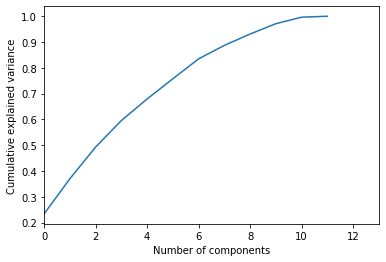

In [106]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,13,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [107]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.23362799, 0.13614845, 0.12296486, 0.10274181, 0.0836405 ,
       0.07845595, 0.07722212, 0.05225097, 0.04398703, 0.04011087,
       0.02526551, 0.00358395])

[]

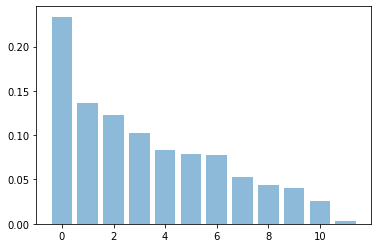

In [108]:
plt.figure(figsize=(6, 4))
plt.bar(range(12), explained_variance, alpha=0.5, align='center',label='individual explained variance')
plt.plot()

In [109]:
pca=PCA(n_components=9)
X_new=pca.fit_transform(X)
X_new


array([[-2.03987761,  0.96779658, -1.50689559, ...,  0.23612008,
        -0.98538838,  1.11888215],
       [-3.19386274,  0.04780028,  0.77169467, ..., -0.62725778,
        -1.29091582, -0.41985085],
       [-2.69939828,  1.60439435, -1.35467239, ...,  0.50630071,
         0.19398839, -0.49298768],
       ...,
       [-2.1001828 ,  1.97582714, -1.7521744 , ...,  0.12785744,
         0.12006874,  0.40135703],
       [-2.08473023, -1.85871412,  1.31135059, ...,  0.61384787,
        -0.19570567, -0.11852172],
       [-0.40789041, -0.01054174, -1.57697967, ..., -1.03349211,
        -0.21023273,  0.72086234]])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=20)
X_train.shape

(202217, 9)

In [111]:
sm = SMOTE(random_state=12)

In [112]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [113]:
log_reg=LogisticRegression()
log_reg.fit(X_train_res, y_train_res)
y_predict_log=log_reg.predict(X_test)

print('Validation Results')
print(log_reg.score(X_test, y_test))
print(recall_score(y_test, log_reg.predict(X_test)))
print(f1_score(y_test, log_reg.predict(X_test)))
print(roc_auc_score(y_test, log_reg.predict(X_test)))
print(precision_score(y_test, log_reg.predict(X_test)))


Validation Results
0.6298882405301157
0.6557358701734751
0.38509316770186336
0.6400375650723213
0.2725876988927142


In [114]:
y_predict=log_reg.predict(X_test)

In [115]:
cm=confusion_matrix(y_test,y_predict)

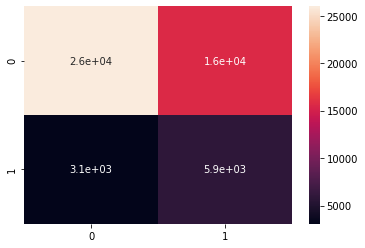

In [116]:
sns.heatmap(cm , annot=True)

In [117]:
coef=log_reg.coef_[0]
pd.DataFrame([x.columns,coef],index = ['Feature','Coef']).transpose()

,Feature,Coef
0,loan_amnt,0.0469322
1,installment,0.136405
2,annual_inc,-0.582406
3,int_rate,-0.19149
4,dti,-0.0476091
5,delinq_2yrs,-0.0598772
6,inq_last_6mths,-0.330751
7,total_acc,-0.0401669
8,open_acc,-0.291554
9,pub_rec,None
